In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [6]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [7]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [8]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [9]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [10]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [12]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [23]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.id.desc()).first()
recent_date

('2017-08-23',)

In [24]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
year_before = dt.date(2017, 8, 23) - dt.timedelta(days=365)

In [25]:
# Perform a query to retrieve the data and precipitation scores for the last 12 months
prcp_last_12 = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= year_before).all()

In [31]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(prcp_last_12, columns=['Date', 'Precipitation'])

In [35]:
# Sort the dataframe by date
df.sort_values('Date', inplace=True)

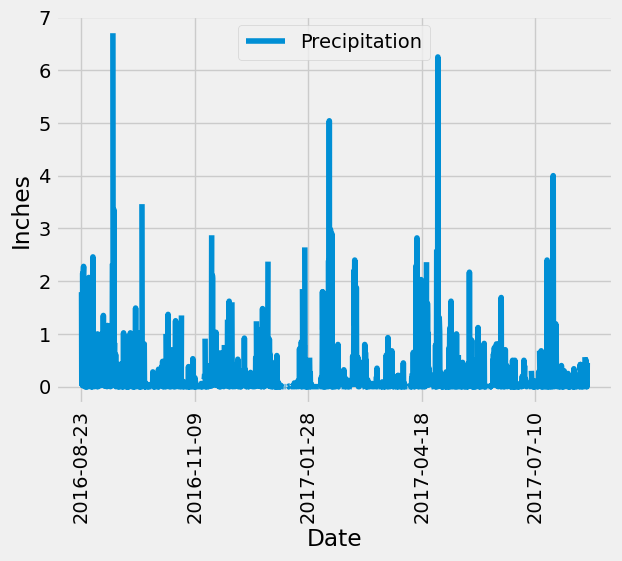

In [36]:
# Use Pandas Plotting with Matplotlib to plot the data
df.plot(x='Date', y='Precipitation',rot=90)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.show()

In [37]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [38]:
# Design a query to calculate the total number of stations in the dataset
session.query(Station.id).count()

9

In [39]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active = session.query(Measurement.station, 
   func.count(Measurement.date)).group_by(Measurement.station).order_by(func.count(Measurement.date).desc()).all()
most_active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [42]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
avg = [func.min(Measurement.tobs),
               func.max(Measurement.tobs),
               func.avg(Measurement.tobs)]
most_active = session.query(*avg).\
    filter(Measurement.station == "USC00519281")
for data in most_active:
    print(data)

(54.0, 85.0, 71.66378066378067)


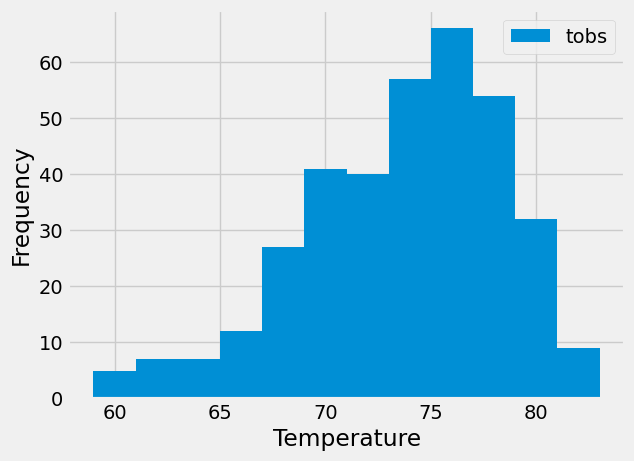

In [46]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
query_date = dt.date(2017, 8, 18) - dt.timedelta(days=365)
query_date

active_station = session.query(Measurement.tobs).\
                filter(Measurement.station == "USC00519281").\
                filter(Measurement.date >= query_date).all()

active_df = pd.DataFrame(active_station, columns=['tobs'])
active_df.plot.hist(bins=12)
plt.xlabel('Temperature')
plt.show()

# Close Session

In [47]:
# Close Session
session.close()